# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.inspection import permutation_importance
import time

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [186]:
#Number of missing data in each column
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

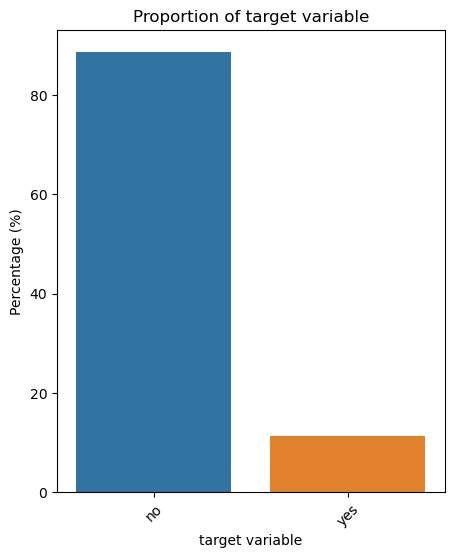

In [9]:
#Proportion of target variable y
y_counts = df['y'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 6))
sns.barplot(x=y_counts.index, y=y_counts.values)
plt.title('Proportion of target variable')
plt.ylabel('Percentage (%)')
plt.xlabel('target variable')
plt.xticks(rotation=45)
plt.show()

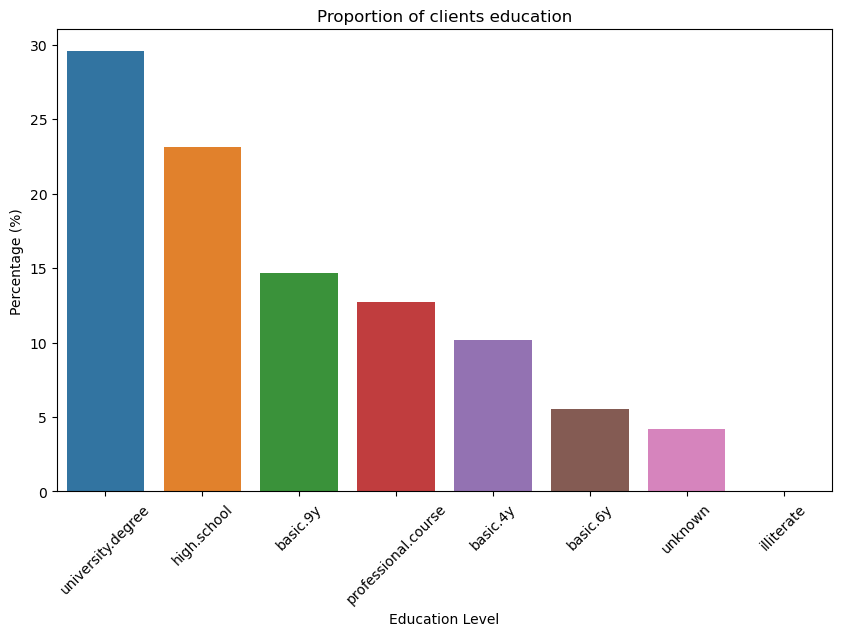

In [7]:
#Proportion of education levels of the clients
edu_counts = df['education'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=edu_counts.index, y=edu_counts.values)
plt.title('Proportion of clients education')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()

In [28]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

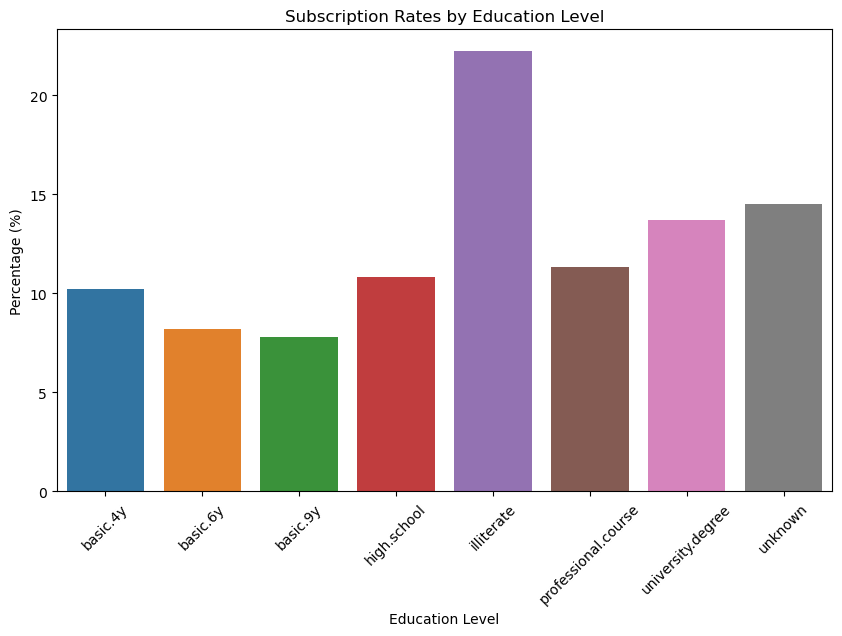

In [23]:
# Group data by education and subscription.Seems like more educated people are subscribing to the term deposit
edu_yes = df.groupby('education')['y'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
edu_yes = edu_yes[edu_yes['y'] == 'yes']
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='percentage', data=edu_yes)
plt.title('Subscription Rates by Education Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()

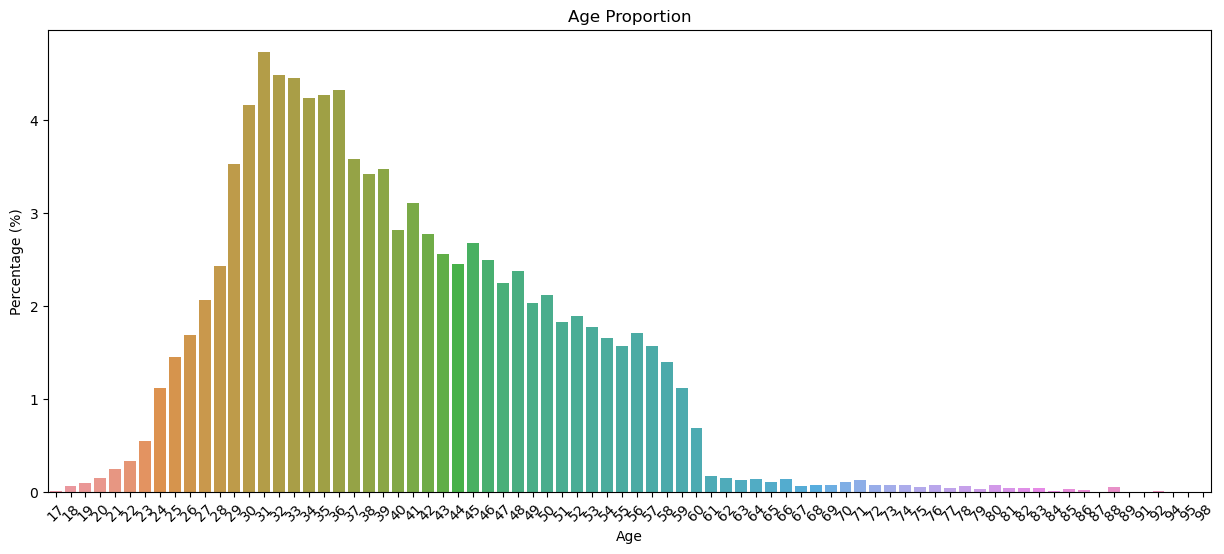

In [12]:
#Age Proportion 
age_counts = df['age'].value_counts(normalize=True) * 100

plt.figure(figsize=(15, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Age Proportion')
plt.ylabel('Percentage (%)')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.show()

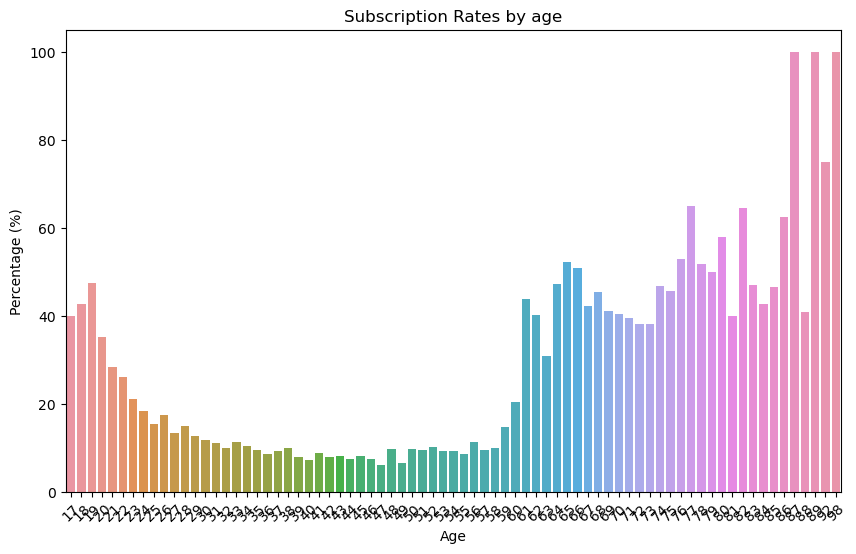

In [21]:
# Group data by age and calculate acceptance rates. Proportion of people less than 20 years old and age more than 60 years old has higher subscription rate
age_yes = df.groupby('age')['y'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
age_yes = age_yes[age_yes['y'] == 'yes']
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='percentage', data=age_yes)
plt.title('Subscription Rates by age')
plt.ylabel('Percentage (%)')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.show()

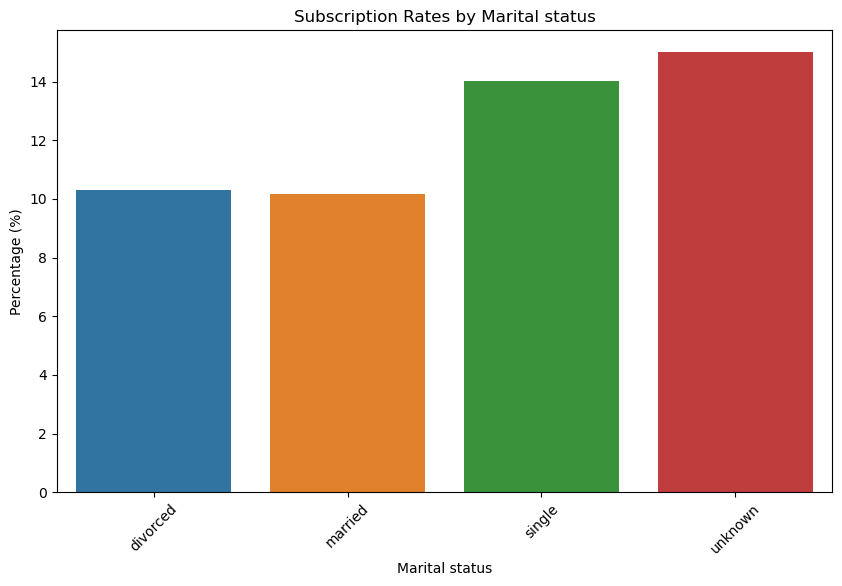

In [22]:
# Group data by education and calculate acceptance rates
marital_yes = df.groupby('marital')['y'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
marital_yes = marital_yes[marital_yes['y'] == 'yes']
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='percentage', data=marital_yes)
plt.title('Subscription Rates by Marital status')
plt.ylabel('Percentage (%)')
plt.xlabel('Marital status')
plt.xticks(rotation=45)
plt.show()

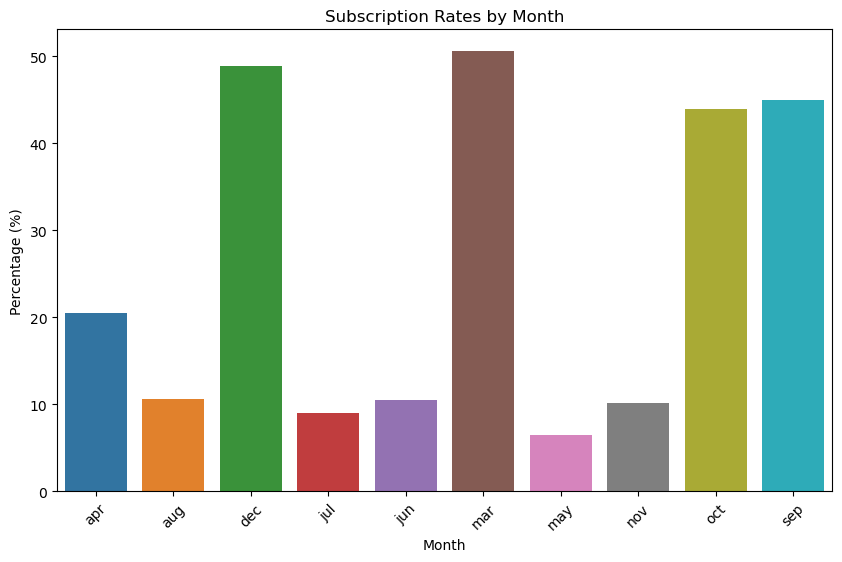

In [25]:
# Group data by education and calculate acceptance rates. Quarter end sees more subscriptions
month_yes = df.groupby('month')['y'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
month_yes = month_yes[month_yes['y'] == 'yes']
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='percentage', data=month_yes)
plt.title('Subscription Rates by Month')
plt.ylabel('Percentage (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

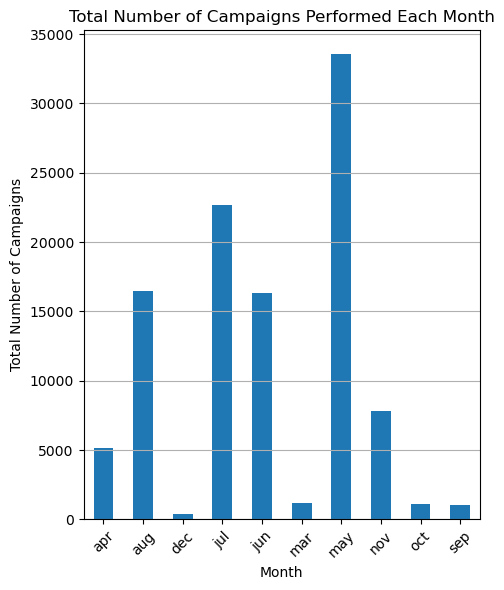

In [33]:
# Tried to see if there is any correlation between the number of compaigns in each month and the subscription rate (based on above chart). But there is none
monthly_campaign_counts = df.groupby('month')['campaign'].sum()
plt.figure(figsize=(5, 6))
monthly_campaign_counts.plot(kind='bar')
plt.title('Total Number of Campaigns Performed Each Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Campaigns')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### The objective of this task is to develp a Machine learning model to predict if the client will subscribe a term deposit based on the data provided. In this task, k-nearest neighbors, logistic regression, decision trees, and support vector machines models will be developed to identify the best performing model and to identify key features that influence the clients. The models developed will provide insights into the patterns and relationship in the data.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [188]:
bank_cols = ["age", "job", "marital", "education", "default", "housing", "loan"]

In [189]:
X = df[["age", "job", "marital", "education", "default", "housing", "loan"]]
y = df["y"]

In [190]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [192]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [193]:
lgr_pipe = Pipeline([('transformer', transformer),
                    ('lgr', LogisticRegression(max_iter = 1000))])

In [194]:
start_time = time.time()
lgr_pipe.fit(X_train, y_train)
end_time = time.time()

In [195]:
time_lgr = (end_time - start_time)
time_lgr

0.6375503540039062

### Problem 9: Score the Model

What is the accuracy of your model?

In [196]:
lgr_test_acc = lgr_pipe.score(X_test, y_test)
lgr_test_acc

0.8865015780529255

In [197]:
lgr_train_acc = lgr_pipe.score(X_train, y_train)
lgr_train_acc

0.887556904400607

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [198]:
dt_pipe = Pipeline([('transformer', transformer),
                    ('dt', DecisionTreeClassifier())])
start_time = time.time()
dt_pipe.fit(X_train, y_train)
end_time = time.time()
time_dt = (end_time - start_time)

In [199]:
dt_train_acc = dt_pipe.score(X_train, y_train)
dt_train_acc

0.9166009104704097

In [200]:
dt_test_acc = dt_pipe.score(X_test, y_test)
dt_test_acc

0.86185967467832

In [201]:
knn_pipe = Pipeline([('transformer', transformer),
                    ('knn', KNeighborsClassifier())])
start_time = time.time()
knn = knn_pipe.fit(X_train, y_train)
end_time = time.time()

In [202]:
time_knn = (end_time - start_time)
time_knn

0.33343505859375

In [203]:
knn_train_acc = knn_pipe.score(X_train, y_train)
knn_train_acc

0.889742033383915

In [204]:
knn_test_acc = knn_pipe.score(X_test, y_test)
knn_test_acc

0.8739985433357611

In [205]:
svm_pipe = Pipeline([('transformer', transformer),
                    ('svc', SVC())])
start_time = time.time()
svm_pipe.fit(X_train, y_train)
end_time = time.time()

In [206]:
time_svc = (end_time - start_time)
time_svc

119.4970190525055

In [207]:
svm_train_acc = svm_pipe.score(X_train, y_train)
svm_train_acc

0.8883763277693475

In [208]:
svm_test_acc = svm_pipe.score(X_test, y_test)
svm_test_acc

0.8866229667394999

In [209]:
res_dict = {'Model': ['KNN', 'Logistic Regression', 'DT', 'SVC'],
            'Train time': [time_knn, time_lgr, time_dt, time_svc],
           'Train Accuracy': [knn_train_acc, lgr_train_acc, dt_train_acc, svm_train_acc],
           'Test Accuracy': [knn_test_acc, lgr_test_acc, dt_test_acc, svm_test_acc]
           }
results_df = pd.DataFrame(res_dict).set_index('Model')

In [210]:
results_df

,Train time,Train Accuracy,Test Accuracy
Model,,,
KNN,0.333435,0.889742,0.873999
Logistic Regression,0.637550,0.887557,0.886502
DT,2.187912,0.916601,0.861860
SVC,119.497019,0.888376,0.886623


### Looking at the results above, all models produced an accuracy close to the baseline model. It indicates the models needs tuning

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [211]:
X=df.drop(columns=['y', 'duration'])
y=df['y']

In [113]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [212]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [222]:

X_encoded = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
pca_final = PCA(n_components=5)
X_selected = pca_final.fit_transform(X_scaled)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42)

In [227]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())

In [228]:
start_time = time.time()
lgr_pipe = Pipeline([('transformer', transformer),
                    ('lgr', LogisticRegression(max_iter = 1000))])
lgr_pipe.fit(X_train, y_train)
end_time = time.time()

In [229]:
time_lgr = (end_time - start_time)
time_lgr

1.2503492832183838

In [230]:
lgr_pipe.score(X_test, y_test)

0.9000679809653297

In [231]:
start_time = time.time()
quad_pipe = Pipeline([('transformer', transformer),
                      ('poly', PolynomialFeatures(degree=4)),
                 ('lgr', LogisticRegression(max_iter = 10000))])
quad_pipe.fit(X_train, y_train)
end_time = time.time()

In [232]:
time_quad_lgr = (end_time - start_time)
time_quad_lgr

44008.60468006134

In [233]:
quad_train_acc = quad_pipe.score(X_train, y_train)
print("Training accuracy for Logistic regression with quadratic features:" + str(quad_train_acc))

Training accuracy for Logistic regression with quadratic features:0.9758505713638277


In [234]:
quad_test_acc = quad_pipe.score(X_test, y_test)
print("Test accuracy for Logistic regression with quadratic features:" + str(quad_test_acc))

Test accuracy for Logistic regression with quadratic features:0.8622899873749635


In [235]:
start_time = time.time()
knn_pipe_5_ = Pipeline([('transformer', transformer), 
                      ('model', KNeighborsClassifier(n_neighbors=5))]).fit(X_train, y_train)
end_time = time.time()

In [236]:
time_imp_knn = (end_time - start_time)
time_imp_knn

0.4835636615753174

In [237]:
knn5_train_acc = knn_pipe_5_.score(X_train, y_train)
print("Training accuracy for KNN with 5 neighbors:" + str(knn5_train_acc))

Training accuracy for KNN with 5 neighbors:0.9135346864782623


In [238]:
knn5_test_acc = knn_pipe_5_.score(X_test, y_test)
print("Test accuracy for KNN with 5 neighbors:" + str(knn5_test_acc))

Test accuracy for KNN with 5 neighbors:0.8942410410799262


In [239]:
dt_pipe = Pipeline([('transformer', transformer),
                    ('dt', DecisionTreeClassifier())])
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019BF5BF2190>)])),
                ('dt', DecisionTreeClassifier())])

In [240]:
params = {'dt__max_depth': [3, 5, 7, 9, 11, 13, 15],
         'dt__min_samples_split': [2,3,4,5,10],
          'dt__criterion': ["entropy", "gini"],
          'dt__min_samples_leaf': [1, 2, 3, 4]
         }

In [241]:
start_time = time.time()
dt_random = RandomizedSearchCV(dt_pipe, params, cv=5)
dt_random.fit(X_train, y_train)
end_time = time.time()
time_random = (end_time - start_time)
random_criterion = dt_random.best_params_["dt__criterion"]
random_max_depth = dt_random.best_params_["dt__max_depth"]
random_min_samples_leaf = dt_random.best_params_["dt__min_samples_leaf"]
random_min_samples_split = dt_random.best_params_["dt__min_samples_split"]
random_training_acc = dt_random.best_score_
random_test_acc = dt_random.score(X_test, y_test)

In [242]:
time_random

47.79087233543396

In [243]:
random_training_acc

0.8998090263961241

In [244]:
random_test_acc

0.899291055647276

In [245]:
params = {'svc__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'svc__gamma': [0.1, 1.0, 10.0],}

In [121]:

svm_pipe = Pipeline([('transformer', transformer),
                     ('feature_selection', SelectFromModel(Lasso())),
                    ('svc', SVC())])

In [137]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [139]:
X=df.drop(columns=['y', 'duration'])
y=df['y']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42)

In [141]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())

In [142]:
params = {'svc__kernel': ['rbf'],
         'svc__gamma': [0.1, 1.0, 10.0],}

In [143]:
svm_pipe = Pipeline([('transformer', transformer),
                     ('feature_selection', SelectFromModel(Lasso())),
                    ('svc', SVC())])

In [163]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['y'])

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA with 10 components
pca_final = PCA(n_components=5)
X_selected = pca_final.fit_transform(X_scaled)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [168]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'C': [0.1, 1.0, 10.0],}

In [151]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
svm_pipe = Pipeline([('transformer', transformer),
                     ('feature_selection', SelectFromModel(Lasso())),
                    ('svc', SVC())])

In [169]:
start_time = time.time()
svc_random = GridSearchCV(SVC(), params, cv=5, scoring='accuracy')
svc_random.fit(X_train, y_train)
end_time = time.time()


In [170]:
time_svc = (end_time - start_time)
svc_training_acc = svc_random.best_score_
svc_test_acc = svc_random.score(X_test, y_test)

In [173]:
svc_training_acc

0.898937784522003

In [172]:
svc_test_acc

0.8973051711580481

In [171]:
time_svc

100080.92608499527

In [174]:
svc_random.best_params_['kernel']

'rbf'

In [178]:

perm_importance = permutation_importance(svc_random, X_test, y_test, n_repeats=30, random_state=42)
mean_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(mean_importance)[::-1]
sorted_names = feature_names[sorted_indices]
sorted_importance = mean_importance[sorted_indices]
for name, importance in zip(sorted_names, sorted_importance):
    print(f"{name}: {importance:.4f}")

education: 0.0100
age: 0.0095
marital: 0.0038
job: 0.0013
default: 0.0005


### Conclusion

#### After tuning the models, Decision tree and KNN performs better compared to other models with 90% and 89.4% accuracy respectively. KNN fit time was faster(0.48s) 
#### Logistic regression with quadratic features took a long time(~44008s) to fit with a test accuracy of 86.2%
#### SVM was extremely slow to fit even after reducing the features using PCA. The accuracy was ar 89.7% .The best kernel was "RBF'
#### Education, Age, Marital status, Job and Default are the influencing features